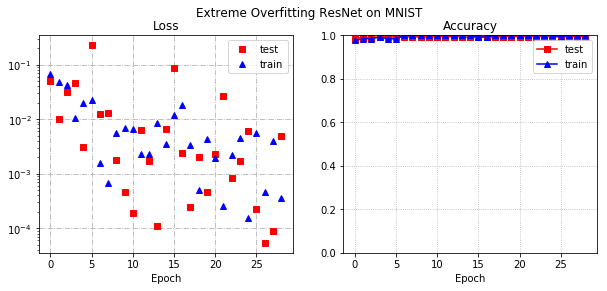

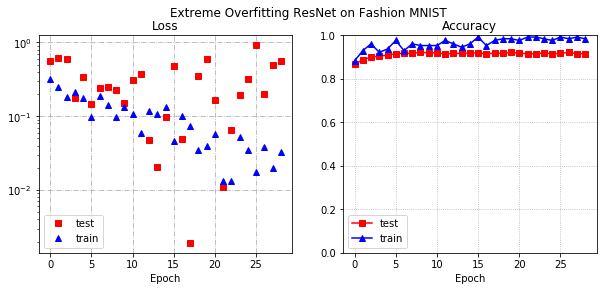

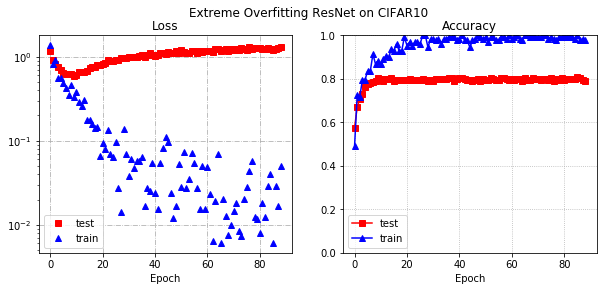

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
start = 0
end = -1
step = 1
model = 'ResNet'
folder = '/raid/data/matlab/sad/'+model+'/'
# folder = ''
datasets = ['MNIST', 'Fashion MNIST', 'CIFAR10']
# files = ['./%s/sig_hist_mnist_corrupted.npz'%model, './%s/sig_hist_fashion_mnist_corrupted.npz'%model, './%s/sig_hist_cifar10_corrupted.npz'%model]
# files = ['./%s/hist_mnist_corrupted.npz'%model, './%s/hist_fashion_mnist_corrupted.npz'%model, './%s/hist_cifar10_corrupted.npz'%model]
# files = ['s_hist_mnist_corrupted_0.npz', 's_hist_fashion_mnist_corrupted_0.npz', 's_hist_fashion_mnist_corrupted_0.npz']
files = ['u_hist_mnist_corrupted_293.npz', 'u_hist_fashion_mnist_corrupted_293.npz', 'u_hist_cifar10_corrupted_293.npz']
# files = ['u_hist_mnist_corrupted_0.npz', 'u_hist_fashion_mnist_corrupted_0.npz', 'u_hist_fashion_mnist_corrupted_0.npz']
for file, dataset in zip(files, datasets):
    data = np.load(folder+file)
    loss_h = data['loss_h']
    loss_val_h = data['loss_val_h']
    acc_h = data['acc_h']
    acc_val_h = data['acc_val_h']
    
    # create the general figure
    fig, ax = plt.subplots(1, 2, figsize = (10,4))

    ax[0].semilogy(loss_val_h[start:end:step], 'rs', label = 'test')
    ax[0].semilogy(loss_h[start:end:step], 'b^', label = 'train')
    ax[0].set_title("Loss")
    ax[0].set_xlabel('Epoch')
    ax[0].tick_params(axis='y')
    ax[0].grid(linestyle = '-.') 
    ax[0].legend()
#     ax2 = ax1.twinx()

    ax[1].plot(acc_val_h[start:end:step], 'rs-', label = 'test')
    ax[1].plot(acc_h[start:end:step], 'b^-', label = 'train')
    ax[1].set_ylim(0,1)
    ax[1].tick_params(axis='y')
    ax[1].grid(linestyle = ':')
    ax[1].set_title("Accuracy")
    ax[1].set_xlabel('Epoch')
    ax[1].legend()
    
    fig.suptitle('Extreme Overfitting %s on %s'%(model, dataset))
#     plt.legend(lim, ax2.get_label())
    plt.legend()
    plt.savefig('%s_%s.pdf'%(model,dataset))
    plt.show()

In [1]:
# Need to restart kernel each time you change the model :(
from importlib import reload
import os
import numpy as np
import torch
from tqdm import tqdm

# import model_def

def weight_from_file(file, model_name):
    os.chdir('./'+model_name + '/')
    print(os.getcwd())
    import model_def
    model = model_def.model_cifar
    model.load_state_dict(torch.load(file))
    model.eval()
    os.chdir('../')
    weight = 0
#     return 0
    for parameter in model.parameters():
        weight += torch.norm(parameter).item()
    del model
    del model_def
    torch.cuda.empty_cache()
    return weight

model_name = 'ResNet'
dataset = 'cifar10'

sad_weights = []
norm_weights = []

for i in tqdm(range(200,319)):
    file = '/raid/data/matlab/sad/'+model_name+'/s'+dataset+'_corrupted_%d'%i
    sad_weights.append(weight_from_file(file, model_name))
    file = '/raid/data/matlab/sad/'+model_name+'/u'+dataset+'_corrupted_%d'%i
    norm_weights.append(weight_from_file(file, model_name))

  0%|                                                                   | 0/119 [00:00<?, ?it/s]

/workspace/sad_points/ResNet


  3%|█▍                                                         | 3/119 [00:18<25:16, 13.07s/it]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


  8%|████▍                                                      | 9/119 [00:19<11:46,  6.42s/it]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 13%|███████▎                                                  | 15/119 [00:19<05:29,  3.17s/it]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 18%|██████████▏                                               | 21/119 [00:19<02:33,  1.57s/it]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 23%|█████████████▏                                            | 27/119 [00:19<01:12,  1.27it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 25%|██████████████▌                                           | 30/119 [00:19<00:50,  1.77it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 30%|█████████████████▌                                        | 36/119 [00:20<00:24,  3.34it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 35%|████████████████████▍                                     | 42/119 [00:20<00:12,  6.08it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 40%|███████████████████████▍                                  | 48/119 [00:20<00:07, 10.04it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 45%|██████████████████████████▎                               | 54/119 [00:20<00:04, 14.72it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 50%|█████████████████████████████▏                            | 60/119 [00:20<00:03, 18.55it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 53%|██████████████████████████████▋                           | 63/119 [00:21<00:02, 19.90it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 58%|█████████████████████████████████▋                        | 69/119 [00:21<00:02, 22.46it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 63%|████████████████████████████████████▌                     | 75/119 [00:21<00:01, 24.42it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 68%|███████████████████████████████████████▍                  | 81/119 [00:21<00:01, 26.21it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 73%|██████████████████████████████████████████▍               | 87/119 [00:21<00:01, 27.38it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 78%|█████████████████████████████████████████████▎            | 93/119 [00:22<00:00, 28.22it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 83%|████████████████████████████████████████████████▎         | 99/119 [00:22<00:00, 28.30it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 88%|██████████████████████████████████████████████████▎      | 105/119 [00:22<00:00, 28.48it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 93%|█████████████████████████████████████████████████████▏   | 111/119 [00:22<00:00, 28.70it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


 96%|██████████████████████████████████████████████████████▌  | 114/119 [00:22<00:00, 28.52it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


100%|█████████████████████████████████████████████████████████| 119/119 [00:32<00:00,  3.68it/s]

/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet
/workspace/sad_points/ResNet


In [29]:
os.chdir('../')

In [23]:
np.std(np.array(norm_weights))

1.5881509023945333

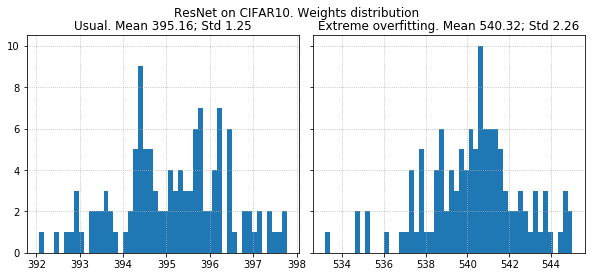

In [2]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt
%matplotlib inline

def plot_weights_distribution(norm_weights, sad_weights, model, dataset):    
    # create the general figure
    fig, ax = plt.subplots(1, 2, figsize = (10,4), sharey = True)
    
    weights = norm_weights
    ax[0].hist(weights, 50)
    ax[0].set_title('Usual. Mean %.2f; Std %.2f'%(np.array(weights).mean(),np.array(weights).std() ))
#     ax[0].set_yticks([], [])
    ax[0].grid(linestyle = ':') 
#     ax2 = ax1.twinx()
    
    weights = sad_weights
    ax[1].hist(weights, 50)
    ax[1].set_title('Extreme overfitting. Mean %.2f; Std %.2f'%(np.array(weights).mean(),np.array(weights).std() ))
#     ax[1].set_yticks([], [])
    ax[1].grid(linestyle = ':') 
    
    fig.suptitle('%s on %s. Weights distribution'%(model, dataset))
    fig.subplots_adjust(wspace=0.05)
    plt.savefig('weights_%s_%s.pdf'%(model,dataset))
    
model = 'ResNet'
dataset = 'CIFAR10'
plot_weights_distribution(norm_weights, sad_weights, model, dataset)

In [10]:
np.array(norm_weights)

array([ 258.23103303,  292.18353224,  313.69381729,  337.36537915,
        355.69504935,  377.26238561,  396.22394562,  415.93539488,
        436.29037464,  453.26585269,  471.30609667,  491.15651405,
        509.53041291,  522.3621763 ,  544.27540934,  559.74588132,
        580.05619609,  595.75666595,  613.07205725,  629.43115556,
        646.39973211,  666.14441109,  682.47277904,  699.7422421 ,
        713.96509254,  733.9466933 ,  746.06617093,  769.05950069,
        783.27115047,  803.41969872,  817.44217038,  830.6080637 ,
        848.67130446,  865.23142719,  882.90155804,  895.81621313,
        917.44854975,  930.83361781,  948.95880353,  968.13495517,
        983.65037572,  998.52682745, 1014.54279959, 1028.60632074,
       1047.29194772, 1065.66525531, 1080.97349977, 1096.01238704,
       1108.88602209, 1127.76058185, 1146.45577776, 1164.39115   ,
       1178.14840019, 1194.61826658, 1208.74186873, 1220.03104913,
       1236.34133708, 1249.09651268, 1262.34798861, 1273.57344